<a href="https://colab.research.google.com/github/saumyadash9/Play-Store-App-Review-Analysis-Capstone-Project/blob/main/Saumya_Dash_of_Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

**Loading Dataset**

In [389]:
#Importing required packages and libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [390]:
#Importing and Mounting Google Drive 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [391]:
#Reading the csv files using pd.read_csv to fetch the dataset in the notebook
df = pd.read_csv('/content/drive/MyDrive/Copy of Play Store Data.csv')
df1 = pd.read_csv('/content/drive/MyDrive/Copy of User Reviews.csv')

**Exploring Dataset**

In [392]:
#Finding information about null and non null values , datatypes of the dataset using info method
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [393]:
#finding information
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [394]:
#observing the dataframe
df1

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [395]:
#observing the dataframe
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [396]:
#looking at unique values of the columns
df.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [397]:
df.Type.unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

In [398]:
df.Price.unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [399]:
df.Rating.unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

In [400]:
df.Reviews.unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [401]:
df.Size.unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     


**Data Cleaning and Handling**

In [402]:
#Handling rating Column
# #1. Substituting the Null values with 2.5/5(average) and values greater with 0
df['Rating'] = df['Rating'].fillna(2.5)
df['Rating'] = df['Rating'].replace(19.,0,regex = True)

In [403]:
#2.Handling reviews column
#Converting the null values in the reviews column as np.nan
df['Reviews'] = pd.to_numeric(df['Reviews'],errors ='coerce')
#replacing the null values np.nan with 0
df['Reviews'] = df['Reviews'] .replace(np.nan,0,regex = True)
#converting the object datatype into numerical(integer) datatype using astype
df['Reviews'] = df['Reviews'].astype(int)

In [404]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          10841 non-null  float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


In [405]:
#Handling Price Columns
#creating a temporary dataframe to find the value_counts
tem_df = df['Price'].value_counts().reset_index()
tem_df[tem_df["index"] =="Everyone"]


,index,Price
60,Everyone,1


In [406]:
#Converting the string values into float by removing $ , replacing the rows with price value 'Everyone' with 0 
df['Price'] = df['Price'].str.replace('$','')
df['Price'] = df['Price'].replace('Everyone',0,regex = True)
df['Price'] = df['Price'].astype(float)

In [407]:
#Handling Installs column
df.Installs = df.Installs.apply(lambda x:x.replace('+',' '))
df['Price'] = df['Price'].astype(float)

In [408]:
#Converting object dtype into float dtype by removing '+' , ','using apply function and replacing 'Free' values in installs column by 0 
df.Installs = df.Installs.apply(lambda x:x.replace('+',''))
df['Installs'] = df['Installs'].replace('Free',"0",regex = True)
df['Installs'] = df['Installs'].replace(',','',regex = True)
df['Installs'] = df['Installs'].astype(float)

In [409]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          10841 non-null  float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  float64
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 1.1+ MB


In [410]:
df.Size.unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [411]:
#Handling Size column
#defining a function to convert Mb and Kb into Bytes and converting into float dtype
def replace_M_k(x):
  if "M" in x:
    return x.replace("M","000000")
  elif "k" in x :
    return x.replace("k","000")
  else:
    return 0
df['Size'] = df['Size'].apply(replace_M_k)
df['Size'] = df['Size'].astype(float)


In [412]:
#In the Size column we can see that the data with less than 20mb are in decimals 
# So To handle it iterating over those values to return correct output in bytes
size_list = []
for i in df.Size:
  if i< 20.0:
    size_list.append(i*1000000)
  else:
    size_list.append(i)
df["Size"] = pd.DataFrame(size_list)

In [413]:
df.Size.unique()

array([1.90e+07, 1.40e+07, 8.70e+06, 2.50e+07, 2.80e+06, 5.60e+06,
       2.90e+07, 3.30e+07, 3.10e+06, 2.80e+07, 1.20e+07, 2.00e+07,
       2.10e+07, 3.70e+07, 2.70e+06, 5.50e+06, 1.70e+07, 3.90e+07,
       3.10e+07, 4.20e+06, 7.00e+06, 2.30e+07, 6.00e+06, 6.10e+06,
       4.60e+06, 9.20e+06, 5.20e+06, 1.10e+07, 2.40e+07, 0.00e+00,
       9.40e+06, 1.50e+07, 1.00e+07, 1.20e+06, 2.60e+07, 8.00e+06,
       7.90e+06, 5.60e+07, 5.70e+07, 3.50e+07, 5.40e+07, 2.01e+05,
       3.60e+06, 5.70e+06, 8.60e+06, 2.40e+06, 2.70e+07, 2.50e+06,
       1.60e+07, 3.40e+06, 8.90e+06, 3.90e+06, 2.90e+06, 3.80e+07,
       3.20e+07, 5.40e+06, 1.80e+07, 1.10e+06, 2.20e+06, 4.50e+06,
       9.80e+06, 5.20e+07, 9.00e+06, 6.70e+06, 3.00e+07, 2.60e+06,
       7.10e+06, 3.70e+06, 2.20e+07, 7.40e+06, 6.40e+06, 3.20e+06,
       8.20e+06, 9.90e+06, 4.90e+06, 9.50e+06, 5.00e+06, 5.90e+06,
       1.30e+07, 7.30e+07, 6.80e+06, 3.50e+06, 4.00e+06, 2.30e+06,
       7.20e+06, 2.10e+06, 4.20e+07, 7.30e+06, 9.10e+06, 5.50e

In [414]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          10841 non-null  float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  float64
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usage: 1.1+ MB


In [415]:
#loacting rows with null values in content rating
df[df['Content Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,0.0,0,0.0,0.0,0,0.0,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [416]:
#Handling Null values in Content Rating by dropping rows using indexvalues.drop
df= df.drop(10472)

In [417]:
#checking unique values n Type column
df.Type.unique()

array(['Free', 'Paid', nan], dtype=object)

In [418]:
#loacting rows with null values in Type column
df[df['Type'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,2.5,0,0.0,0.0,NaN,0.0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [419]:
#Handling Null values in Type by dropping rows using indexvalues.drop
df= df.drop(9148)

In [420]:
#handling null values in Current version by replacing it with most occuring Current version in the dataset
df['Current Ver'] = df['Current Ver'].replace(np.nan,"Varies with device")
df.isnull().sum().sort_values(ascending=False)

Android Ver       2
App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
dtype: int64

In [421]:
#handling null values in Android by replacing it with most occuring Current version in the dataset
relevent_df = df.groupby('Android Ver').App.count().sort_values(ascending = False).reset_index()
relevent_df
df['Android Ver'] = df['Android Ver'].replace(np.nan,"4.1 and up")

In [422]:
#Checking null values using sum operation in each column and sorting it in ascending order
df.isnull().sum().sort_values(ascending=False)

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [423]:
#checking information about the reviews daatset 
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [424]:
#looking at reviews dataset
df1

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [425]:
#Checking null values using sum operation in each column and sorting it in ascending order
df1.isnull().sum().sort_values(ascending=False)

Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
App                           0
dtype: int64

In [426]:
#dropping null values from dataframe
df1 = df1.dropna()

In [427]:
df1.isnull().sum().sort_values(ascending=False)

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64


**Data Visualization**

In [428]:
# Importing matplotlib.pyplot 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [429]:
##creating customised dataframes to visualize data
df_category_value_counts = df.groupby('Category').App.count().reset_index()
df_category_value_counts.rename(columns = {'Category':'app_category','App': 'Number_of_apps'}, inplace = True)
df_category_value_counts

,app_category,Number_of_apps
0,ART_AND_DESIGN,65
1,AUTO_AND_VEHICLES,85
2,BEAUTY,53
3,BOOKS_AND_REFERENCE,231
4,BUSINESS,460
5,COMICS,60
6,COMMUNICATION,387
7,DATING,234
8,EDUCATION,156
9,ENTERTAINMENT,149


In [430]:
#creating customised dataframes to visualize data
df_category_installs= df.groupby('Category')["Installs"].mean().reset_index()
df_category_installs.rename(columns = {'Category': 'app_category'}, inplace = True)
df_category_installs

,app_category,Installs
0,ART_AND_DESIGN,1.912894e+06
1,AUTO_AND_VEHICLES,6.250613e+05
2,BEAUTY,5.131519e+05
3,BOOKS_AND_REFERENCE,8.318050e+06
4,BUSINESS,2.178076e+06
5,COMICS,9.347692e+05
6,COMMUNICATION,8.435989e+07
7,DATING,1.129533e+06
8,EDUCATION,5.586231e+06
9,ENTERTAINMENT,1.925611e+07


Text(0, 0.5, 'Number of apps')

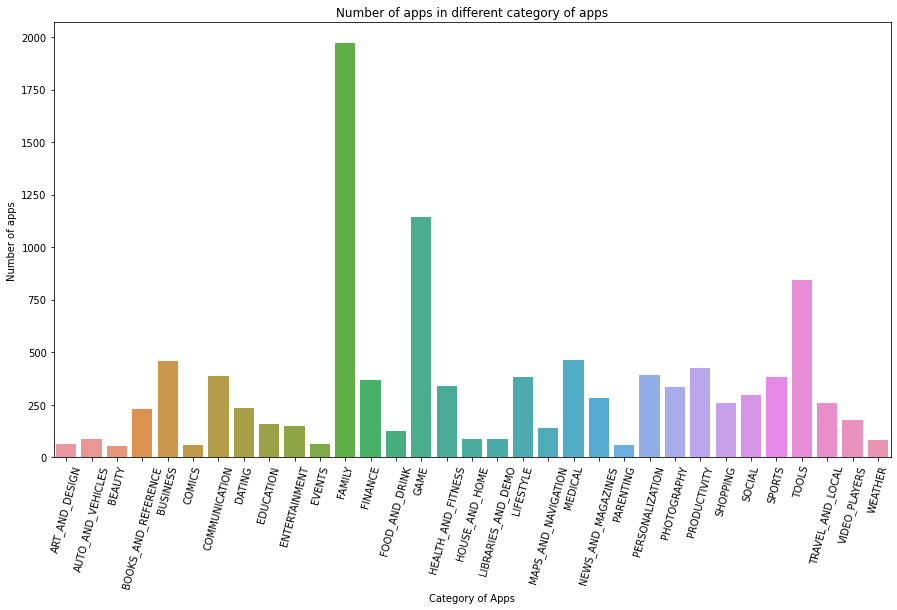

In [431]:
#plotting figure to show the number of apps in each category
plt.figure(figsize=(15, 8))
sns.barplot(data=df_category_value_counts , x='app_category', y='Number_of_apps')
plt.xticks(rotation=75)
plt.title('Number of apps in different category of apps')
plt.xlabel('Category of Apps')
plt.ylabel('Number of apps')

Text(0, 0.5, 'Number of installs')

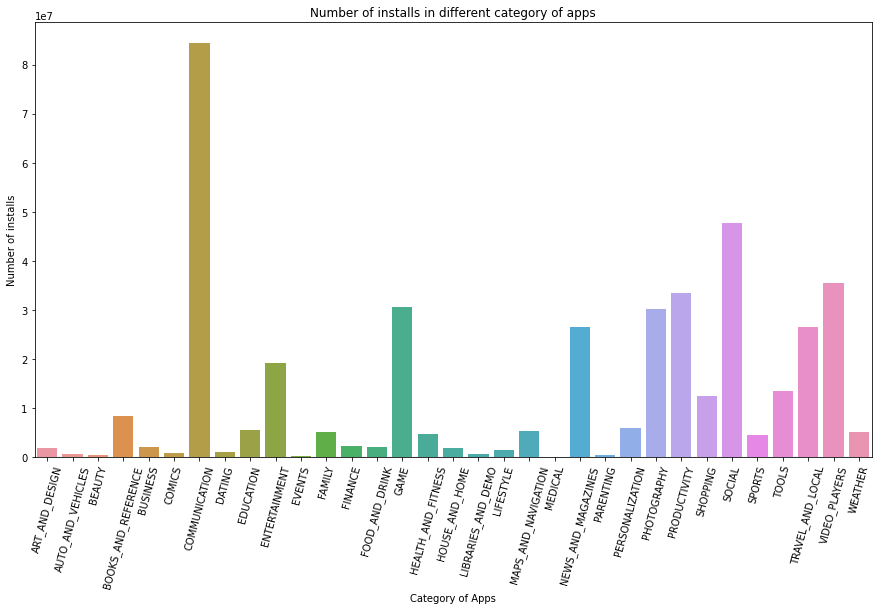

In [432]:
#plotting figure to show the number of installs in each category
plt.figure(figsize=(15, 8))
sns.barplot(data=df_category_installs , x='app_category', y='Installs')
plt.xticks(rotation=75)
plt.title('Number of installs in different category of apps')
plt.xlabel('Category of Apps')
plt.ylabel('Number of installs')

In [433]:
#merging two dataframes to plot data
pd.merge(df_category_value_counts, df_category_installs, on='app_category')

,app_category,Number_of_apps,Installs
0,ART_AND_DESIGN,65,1.912894e+06
1,AUTO_AND_VEHICLES,85,6.250613e+05
2,BEAUTY,53,5.131519e+05
3,BOOKS_AND_REFERENCE,231,8.318050e+06
4,BUSINESS,460,2.178076e+06
5,COMICS,60,9.347692e+05
6,COMMUNICATION,387,8.435989e+07
7,DATING,234,1.129533e+06
8,EDUCATION,156,5.586231e+06
9,ENTERTAINMENT,149,1.925611e+07


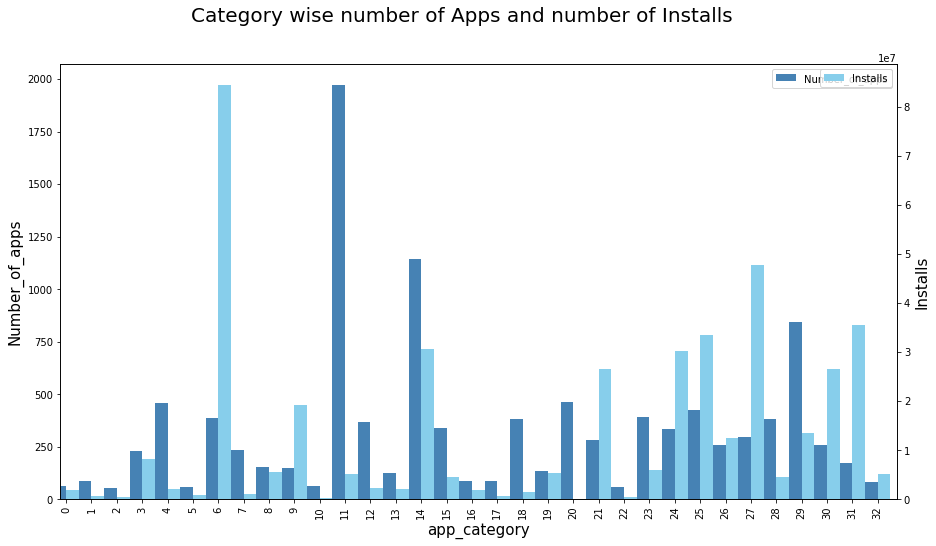

In [434]:
#plotting figure to show the number of apps and number of installs of each category simultaneously to draw insights from it
fig = plt.figure(figsize =(15,8))
plt.xlabel('Category of Apps')# Create matplotlib figure 
ax = fig.add_subplot(111)
ax.set_xlabel('app_category') # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.5

df_category_value_counts.plot(kind='bar', color='steelblue', ax=ax, width=width, position=1)
df_category_installs.plot(kind='bar', color='skyblue', ax=ax2, width=width, position=0)
ax.set_xlabel('app_category',fontsize = 15)
plt.xticks(rotation=75)
ax.set_ylabel('Number_of_apps',fontsize = 15)
ax2.set_ylabel('Installs',fontsize = 15)
plt.xlabel("app_category")
# title of the plot
plt.suptitle("Category wise number of Apps and number of Installs ",fontsize = 20)
plt.show()

In [437]:
# df_category_value_counts .plot(kind='bar',color = 'Pink',figsize = (20,7))

# plt.title('Number of apps in each category')
# plt.ylabel('Number of apps')
# plt.xlabel('app_category')

In [438]:
?

In [439]:
# plt.bar(x-0.2, df_category_value_counts['Number of apps'],
#         width, color='tab:red', label='Number of apps')
# plt.bar(x+0.2, df_category_installs['Installs'],
#         width, color='gold', label='Number of Installs')
# plt.title('Category wise number of Apps and number of Installs ', fontsize=25)
# plt.xlabel('Category')
# plt.ylabel('Numbers', fontsize=20)
# plt.yticks(fontsize=17)
# sns.despine(bottom=True)
# ax.grid(False)
# ax.tick_params(bottom=False, left=True)
# plt.legend(frameon=False, fontsize=15)
# plt.show()

In [440]:
# #dealing with Size
# def strip(bytesData):
#       if "k" in bytesData:
#               bytesData/1000
#       elif "M" in bytesData:
#               bytesData/1000000
#       else  df['Size'] = df.drop(columns=['Size'])

# df['Size']=df.apply(lambda x: strip(x['byteData']), axis=1)

In [441]:
#df['Price'] = df['Price'].str.replace('$', '')


In [442]:
#df['Price'] = df['Price'].astype(float)

In [443]:
#df.info()

In [444]:
# #df['Reviews'] = pd.to_numeric(df['Reviews'],errors ='coerce')
# df = df.replace(np.nan,0,regex = True)
# df['Reviews'] = df['Reviews'].astype(int)

In [445]:
#df['DataFrame Column'] = pd.to_numeric(df['DataFrame Column'], errors='coerce')

In [446]:

# df['Price'] = pd.to_numeric(df['Price'],errors='coerce')
# df = df.replace(np.nan, 0, regex=True)
# df['Price'] = df['Price'].astype(int)

In [447]:
#print (df.dtypes)

In [448]:
#df.Type.unique()

In [449]:
#import matplotlib.pyplot as plt
#import seaborn as sns

In [450]:
# fig, ax = plt.subplots()

# sns.catplot("Pclass", hue="Survived", data=df, kind="count", 
#             palette={1:"blue", 0:"green"}, ax=ax)

# plt.close(2) # catplot creates an extra figure we don't need

# ax.set_xlabel("Passenger Class")

# color_patches = []
#     Patch(facecolor="blue", label="survived"),
#     Patch(facecolor="green", label="did not survive")
# ]
# ax.legend(handles=color_patches)

# fig.suptitle("Passenger Class vs. Survival for Titanic Passengers");

In [451]:
#df['Reviews'] = df['Reviews'].astype('float')